In [185]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Removing display limit of dataframe
pd.options.display.max_columns = 100
pd.options.display.max_rows = None
pd.options.display.width=None
# Setting style for seaborn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
# Read CSV file and check and load the data set for further analysis 
loan = pd.read_csv('loan.csv')

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [6]:
# check shape of loan data
loan.shape

(39717, 111)

In [7]:
#so we have total 39717 entries of loan and 111 coloumns defining the details of a particular loan 
# Lets check the info about the dataframe we will also print all the coloumns to check there dtypes 
#and see if we need to change any coloumns dtype
loan.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

These details tells us that there are mainly three type of data in the dataframe float64(74), int64(13), object(24)

### Cleaning the dataSet

1: Check and remove any duplicate Row \
2: Check and Remove the coloumns having more then 70% of null value \
3: Check and Remove the rows having null value 

### 1: Check and remove any duplicate Row

In [12]:
loan.duplicated().sum()

0

It Seems there is no duplicate row in the data set 

### 2: Check and Remove the coloumns having more then 70% of null value

In [15]:
# how many null values dataset have in total 
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [16]:
#calculate the percentage of null values in a columns and print the column have percentage more then 60 
# as null values can impact the data analysis
nullValuePercentage= round((loan.isnull().sum()/len(loan))*100,2)
nullValuePercentage[nullValuePercentage>60].sort_values(ascending=False)

mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq                    100.00
percent_bc_gt_75                  100.00
tot_hi_cred_lim 

In [17]:
#removing the columns having more than 60% of null value
loan = loan.loc[:,(loan.isnull().sum()/len(loan)*100)<60]

print(loan.shape)

(39717, 54)


In [18]:
# again check the percentage of null value in the coloumns 
print(round((loan.isnull().sum()/len(loan))*100,2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

### Removing addition columns which are not important for anlysis or have most of the value null or 0 

In [20]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [21]:
loan.drop( ['id', 'member_id', 'emp_title', 'collection_recovery_fee','url', 'desc',
            'title','zip_code','inq_last_6mths','collection_recovery_fee',
            'recoveries','tax_liens','total_rec_late_fee','policy_code','last_pymnt_d',
            'earliest_cr_line','total_rec_int','total_rec_prncp','delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc'],axis=1,inplace=True)

In [22]:
loan.drop(['last_pymnt_amnt','total_pymnt_inv','total_pymnt'],axis=1 ,inplace=True)

In [23]:
loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','revol_util','revol_bal','last_credit_pull_d'],axis=1,inplace=True)

In [24]:
loan.shape

(39717, 25)

In [25]:
print(round((loan.isnull().sum()/len(loan))*100,2).sort_values(ascending=False))

emp_length              2.71
pub_rec_bankruptcies    1.75
loan_status             0.00
delinq_amnt             0.00
acc_now_delinq          0.00
application_type        0.00
out_prncp_inv           0.00
out_prncp               0.00
initial_list_status     0.00
dti                     0.00
addr_state              0.00
purpose                 0.00
pymnt_plan              0.00
loan_amnt               0.00
funded_amnt             0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
term                    0.00
funded_amnt_inv         0.00
issue_d                 0.00
dtype: float64


There are some entries in the Emp length which are null lets explore them why are they null and replace them with some value 


In [27]:
print(loan.emp_length.isnull().sum())
#there are 1075 entries which are null out off 39717 
loan.emp_length.value_counts()

1075


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [28]:
# Lets format employment length column to have only numbers.we may need it for analysis

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')


In [29]:
loan.emp_length.value_counts()
# now we have number in emp length coloumn and we have formated the string as well to convert it to Int 

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: count, dtype: int64

In [30]:
# checking the default value for the null entries in pub_rec_bankruptcies
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [32]:
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

#### Removing the rows where Loan_status = Current

In [34]:
#Lets remove the data with loan_status as current 
loan = loan[loan.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan.shape)


(38577, 25)


In [35]:
#lets check if all null value is removed 
print(loan.isnull().sum().sort_values(ascending=False))

loan_amnt               0
loan_status             0
delinq_amnt             0
acc_now_delinq          0
application_type        0
out_prncp_inv           0
out_prncp               0
initial_list_status     0
dti                     0
addr_state              0
purpose                 0
pymnt_plan              0
issue_d                 0
funded_amnt             0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt_inv         0
pub_rec_bankruptcies    0
dtype: int64


Yes now since we have removed all the unwanted coloumns and Null value from the other coloumns \
now lets analyse the remain coloumns and see we need to correct any data or remove any rows 

##### First Lets check if any coloumn have only one single unique value 

In [38]:
# Checking columns having very few unqiue values that will not impact the analysis 
loan.nunique().sort_values(ascending=True)

acc_now_delinq              1
application_type            1
out_prncp_inv               1
out_prncp                   1
pymnt_plan                  1
initial_list_status         1
delinq_amnt                 1
term                        2
loan_status                 2
pub_rec_bankruptcies        3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  370
loan_amnt                 870
funded_amnt              1019
dti                      2853
annual_inc               5215
funded_amnt_inv          8050
installment             15022
dtype: int64

#### Removing all the coloumns having single unique value because we cant created a category out of it 

In [40]:
# Removing columns which contain one unique value
loan.drop(['acc_now_delinq','application_type','out_prncp_inv','out_prncp','initial_list_status','pymnt_plan','delinq_amnt'],axis=1,inplace=True)
loan.shape

(38577, 18)

In [41]:
# Columns in the dataframe
print(loan.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [42]:
#printing info and checking teh dTypes of columns 
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

Lets Print the columns and see in what all coloumns we need to format the data 

In [78]:
loan.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.0
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0.0
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0.0
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,1,RENT,15000.00,Verified,Dec-11,Charged Off,other,TX,18.08,0.0
10,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,5,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0.0


We need to Remove % symbol from intrest Rate coloumn


In [92]:
#also changing the dtype of int_rate to float
loan.int_rate=loan.int_rate.str.strip('%').astype(float)

In [94]:
loan.int_rate.dtype

dtype('float64')

In [98]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

In [100]:
loan.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,year,month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12


In [102]:
loan.nunique().sort_values(ascending=True)

loan_status                 2
term                        2
pub_rec_bankruptcies        3
verification_status         3
home_ownership              5
year                        5
grade                       7
emp_length                 11
month                      12
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  370
loan_amnt                 870
funded_amnt              1019
dti                      2853
annual_inc               5215
funded_amnt_inv          8050
installment             15022
dtype: int64

### Correcting the Data of categorical coloumns

In [128]:
#checking for unique value in term coloumn
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [138]:
#As we can see there is a space at the start of the string let remove that
loan.term = loan.term.str.lstrip()

In [140]:
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [165]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [178]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'year',
       'month'],
      dtype='object')

## Data Analysis

#### Univeriate Analysis

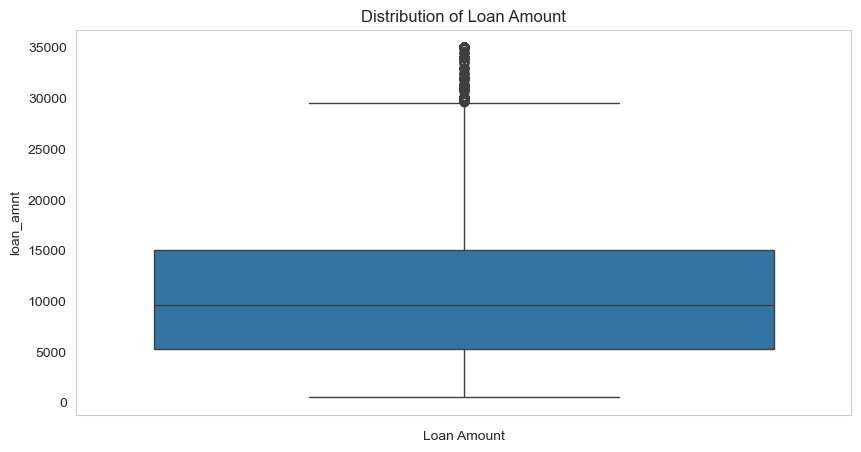

In [245]:
#Starting with Loan Amount 
#will check for the Outliers 

plt.figure(figsize=(10,5))
sns.boxplot(loan.loan_amnt)

plt.xlabel("Loan Amount")
plt.title("Distribution of Loan Amount")
plt.show()


#### Observation
-   Most of the loan amount value is between 5000 to 15000 and Median is somewhere between 10000
-   There are some loan amount which is greated then 30000 which seems to be an outlier
-   Upper Fence is somwhere around 30k and outliers are between 30 to 35 k
-   as calculated below the percentage of outlier is very less which will not impact the analysis so keep as it is for now 

Lets Check the percentage of outlier 

In [303]:
(loan[loan.loan_amnt>29000].shape[0]/len(loan.loan_amnt))*100

2.8644010679938825